In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#!pip install neattext
#!pip install plotly
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
#!pip install keras
#import keras
#from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
#from keras.callbacks import EarlyStopping,ReduceLROnPlateau
#from keras.models import Sequential
#!pip install tensorflow
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

#Data Wrangling
df = pd.read_csv("sentiment_tweets.csv")

# preview the data
df.head()

,Index,message,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message                    10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [3]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [4]:
df.shape

(10314, 3)

In [5]:
df.message

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message, Length: 10314, dtype: object

In [6]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

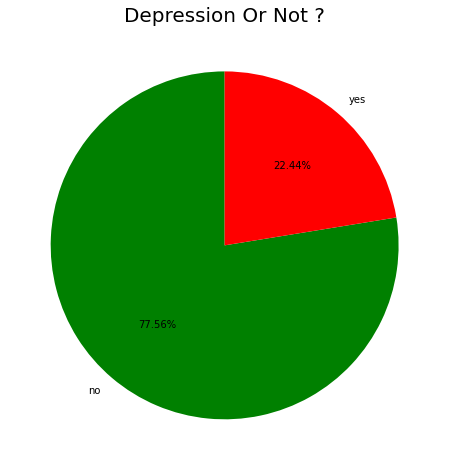

In [7]:


plt.figure(figsize=(10,8))
plt.pie(df['label (depression result)'].value_counts(),startangle=90,colors=['green', 'red'],
        autopct='%0.2f%%',labels=['no','yes'])
plt.title('Depression Or Not ?',fontdict={'size':20})
plt.show()

#['#06dddf','#000fbb'],



In [8]:

tweets = df.values[:,1]
labels = df.values[:,2].astype(float)
#print (tweets[45], labels[45])
#print (tweets[8005], labels[8005])



In [9]:
#!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [10]:
#Embedding
embeddings = bert_model.encode(tweets, show_progress_bar=True)

print (embeddings.shape)



Batches: 100%|██████████| 323/323 [09:39<00:00,  1.79s/it]

(10314, 768)


In [11]:
embeddings

array([[-0.88297683,  0.045337  ,  1.038359  , ..., -0.28533867,
        -0.02419497, -0.21043606],
       [-0.43105194, -0.7311447 ,  0.6841728 , ...,  0.16172639,
         0.17172974, -0.6560318 ],
       [ 0.22631957, -0.38629708,  0.8538063 , ...,  0.02654455,
        -0.205984  ,  0.02080384],
       ...,
       [-0.2663838 , -0.32669133,  0.7152725 , ..., -0.10697744,
        -0.41044775,  0.29736015],
       [-0.87485933, -0.20091745,  0.28983176, ..., -0.26827544,
         0.05667134, -0.21770394],
       [-1.1190494 , -0.08939341,  0.03098689, ..., -0.17223687,
        -0.19136567,  0.36089864]], dtype=float32)

In [12]:
#Assign data
X = embeddings
y = df['label (depression result)']

In [13]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#20% better

In [15]:
#Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#Random Forest (Without hyperparameter tuning)
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(random_state=42) #get instance of model
fit_rf = model_rf.fit(X_train, y_train) #train or fit model
y_pred_rf = model_rf.predict(X_test) #get y predictons
print(classification_report(y_test, y_pred_rf)) #output accuracy or Classification report
print("Accuracy of the model is: ")
accuracy_score(y_test, y_pred_rf)
print(accuracy_score(y_test, y_pred_rf))  #Accuracy score

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1608
           1       0.97      0.84      0.90       455

    accuracy                           0.96      2063
   macro avg       0.97      0.92      0.94      2063
weighted avg       0.96      0.96      0.96      2063

Accuracy of the model is: 
0.9597673291323315


[[1598   10]
 [  73  382]]


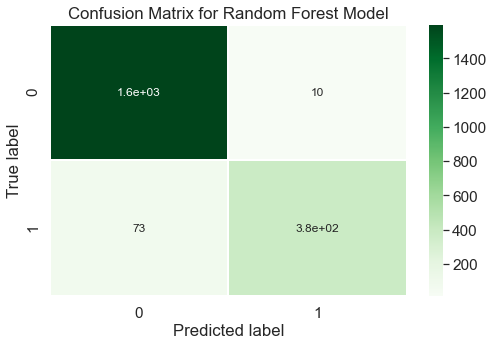

In [21]:
#infusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize=(8,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_rf, annot=True, annot_kws={'size':12},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
#How to interpret infusion metrix
#1554 is the amount of True Positives in our data, while 415 is the amount of True Negatives. 7 & 87 are the number of errors.
#There are 7 Type 1 errors (False Positives)- You predicted positive and it’s false.
#There are 87 Type 2 errors (False Negatives)- You predicted negative and it’s false. 
# Hence, if we calculate the accuracy its # Correct Predicted/ # Total.
#In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.
#Accuracy = (TP + TN)/(TP + TN + FP + FN).
#Accuracy =(1554+415)/(1554+415+7+87) = 1969/2063 = 0.9544 = 95.44% accuracy



In [22]:
words = np.array(['not depressed', 'depressed'])
print("The outcome is: ")
print(words[fit_rf.predict([bert_model.encode("I can't sleep I can't eat properly I'm always sad. I want to dieWelcome to depression")])].squeeze())

The outcome is: 
depressed


In [23]:
#Hyperparameter tuning_random forest 
#HPs are parameters that can be adjusted and fine tuned in order to improve the performance of the machine learning model
#A hyperparameter is a parameter whose value is used to control the learning process. 
# Hyperparameters are points of choice or configuration that allow a machine learning model to be customised for a specific task or dataset.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
fit_rf_h = rf_random.fit(X_train, y_train)
fit_rf_h



Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, verbose=2)

In [24]:
y_pred_rf_h=rf_random.predict(X_test)
print(accuracy_score(y_test, y_pred_rf_h)) 

0.9621909840038778


[[1600    8]
 [  70  385]]


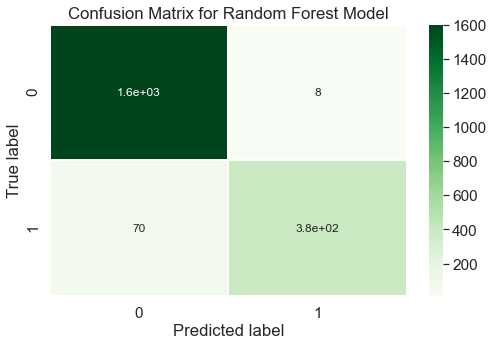

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf_h = confusion_matrix(y_test, y_pred_rf_h)
print(cm_rf_h)
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize=(8,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_rf_h, annot=True, annot_kws={'size':12},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [26]:
words = np.array(['not depressed', 'depressed'])
print("The outcome is: ")
print(words[fit_rf_h.predict([bert_model.encode("I can't sleep I can't eat properly I'm always sad. I want to dieWelcome to depression")])].squeeze())

The outcome is: 
depressed


In [27]:
#Naives Bayes Classifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
model_nb= GaussianNB() #get instance of model
fit_nb = model_nb.fit(X_train, y_train) #train or fit model
y_pred_nb=model_nb.predict(X_test) #get y predictons
print(classification_report(y_test, y_pred_nb)) #output accuracy or Classification report
print("Accuracy of the model is: ")
print(accuracy_score(y_test, y_pred_nb))  #Accuracy score



              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1608
           1       0.80      0.93      0.86       455

    accuracy                           0.93      2063
   macro avg       0.89      0.93      0.91      2063
weighted avg       0.94      0.93      0.93      2063

Accuracy of the model is: 
0.9321376635967038


[[1501  107]
 [  33  422]]


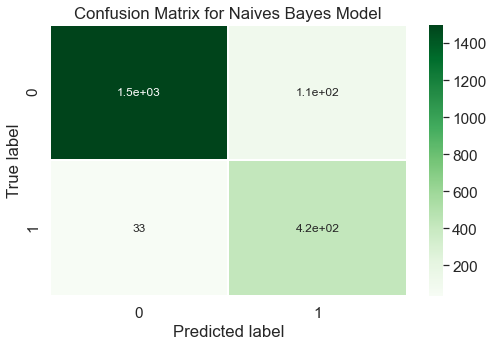

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
accuracy_score(y_test, y_pred_nb)

from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize=(8,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_nb, annot=True, annot_kws={'size':12},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naives Bayes Model')
plt.show()

In [29]:
words = np.array(['not depressed', 'depressed'])
print("The outcome is: ")
print(words[fit_nb.predict([bert_model.encode("I can't sleep I can't eat properly I'm always sad. I want to dieWelcome to depression")])].squeeze())

The outcome is: 
depressed


In [31]:
#SVM(Support Vectpr Machine)
from sklearn.metrics import classification_report
from sklearn.svm import SVC
model_svm = SVC(random_state=42) #get instance of model
fit_svm = model_svm.fit(X_train, y_train) #train or fit model
y_pred_svm = model_svm.predict(X_test) #get y predictons
print(classification_report(y_test, y_pred_svm)) #output accuracy or Classification report
print("Accuracy of the model is: ")
print(accuracy_score(y_test, y_pred_svm))  #Accuracy score

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1608
           1       1.00      0.96      0.98       455

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

Accuracy of the model is: 
0.9903053805138148


[[1606    2]
 [  18  437]]


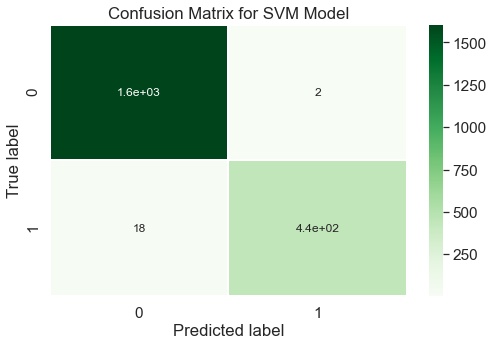

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)

from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize=(8,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_svm, annot=True, annot_kws={'size':12},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [33]:
words = np.array(['not depressed', 'depressed'])
print("The outcome is: ")
print(words[fit_svm.predict([bert_model.encode("I can't sleep I can't eat properly I'm always sad. I want to dieWelcome to depression")])].squeeze())

The outcome is: 
depressed
